## Natural Language Processing (NLP)

El procesamiento del lenguaje natural (**NLP**), se define ampliamente como la manipulación automática del lenguaje natural, como el habla y el texto, por parte del software.

El estudio de **NLP** existe desde hace más de 50 años y surgió del campo de la lingüística con el auge de los ordenadores.

**El lenguaje natural se refiere a la forma en que nosotros, los humanos, nos comunicamos entre nosotros.**

Dada la importancia de este tipo de datos, debemos tener métodos para comprender y razonar sobre el lenguaje natural, tal como lo hacemos con otros tipos de datos.

En Python, tenemos la libreria **NLTK** (**Natural Language ToolKit**), éste es un modulo que contiene herramientas para el manejo del lenguaje natural.

```python
pip install nltk
```

_**Documentación:** https://www.nltk.org/_

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [4]:
# Para descargar paquetes

nltk.download()

# De corpora descargar: wordnet y stopwords
# De models descargar: porter_test, punkt, spanish_grammars, vader_lexicon

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
# Abrimos el archivo .txt

with open(file = "constitucion.txt", mode = "r", encoding = "latin-1") as file: 
    texto = file.read()
    
texto = texto.lower()

print(texto)

el artículo 1 españa se constituye en un estado social y democrático de derecho, que propugna como valores superiores de su ordenamiento jurídico la libertad, la justicia, la igualdad y el pluralismo político.
el artículo 2 la constitución se fundamenta en la indisoluble unidad de la nación española, patria común e indivisible de todos los españoles, y reconoce y garantiza el derecho a la autonomía de las nacionalidades y regiones que la integran y la solidaridad entre todas ellas.
los artículos 3,3.4 el castellano es la lengua española oficial del estado. todos los españoles tienen el deber de conocerla y el derecho a usarla.
el artículo 4 la bandera de españa está formada por tres franjas horizontales, roja, amarilla y roja, siendo la amarilla de doble anchura que cada una de las rojas.
el artículo 5 la capital del estado es la villa de madrid.
el artículo 6 los partidos políticos expresan el pluralismo político, concurren a la formación y manifestación de la voluntad popular y son i

### Tokenizar

Separar palabras del texto en entidades llamadas **tokens**, con las que trabajaremos luego. Estos tokens pueden tener cualquier tamaño, pueden ser elementos de **n-palabras**.

In [6]:
# Usando nltk.word_tokenize() convertimos en tokens cada palabra del archivo

tokens = nltk.word_tokenize(text = texto, language = "spanish")


for token in tokens[:5]: 
    print(token, type(token))
    
# tokens es una lista de strings

el <class 'str'>
artículo <class 'str'>
1 <class 'str'>
españa <class 'str'>
se <class 'str'>


In [8]:
from nltk.tokenize import sent_tokenize

frases = sent_tokenize(text = texto) # Crea tokens de oraciones 
frases

['el artículo 1 españa se constituye en un estado social y democrático de derecho, que propugna como valores superiores de su ordenamiento jurídico la libertad, la justicia, la igualdad y el pluralismo político.',
 'el artículo 2 la constitución se fundamenta en la indisoluble unidad de la nación española, patria común e indivisible de todos los españoles, y reconoce y garantiza el derecho a la autonomía de las nacionalidades y regiones que la integran y la solidaridad entre todas ellas.',
 'los artículos 3,3.4 el castellano es la lengua española oficial del estado.',
 'todos los españoles tienen el deber de conocerla y el derecho a usarla.',
 'el artículo 4 la bandera de españa está formada por tres franjas horizontales, roja, amarilla y roja, siendo la amarilla de doble anchura que cada una de las rojas.',
 'el artículo 5 la capital del estado es la villa de madrid.',
 'el artículo 6 los partidos políticos expresan el pluralismo político, concurren a la formación y manifestación de l

### Total de palabras y Palabras únicas

In [9]:
total_palabras = len(tokens)

print(f"Total de palabras en el texto: {total_palabras}")

palabras_diferentes = len(set(tokens))

print(f"Total de palabras diferentes en el texto: {palabras_diferentes}")

Total de palabras en el texto: 219
Total de palabras diferentes en el texto: 115


### Riqueza Léxica

La riqueza léxica es la relación que existe entre la extensión de un texto y el número de palabras distintas que contiene. 

In [10]:
riqueza_lexica = palabras_diferentes / total_palabras

print(f"Riqueza Lexica: {riqueza_lexica}")

Riqueza Lexica: 0.5251141552511416


In [11]:
# Funcion para calcular la riqueza lexica

def riqueza_lexica_fun(tokens):
    
    total_palabras = len(tokens)
    palabras_diferentes = len(set(tokens))
    
    riqueza_lexica = palabras_diferentes / total_palabras
    
    return riqueza_lexica

In [12]:
riqueza_lexica_fun(tokens)

0.5251141552511416

### .Text()

Transforma un objeto string a un objeto **`Text`** para ser manipulado por **`NLTK`**.

In [13]:
texto_nltk = nltk.Text(tokens)

texto_nltk

<Text: el artículo 1 españa se constituye en un...>

In [14]:
type(texto_nltk)

nltk.text.Text

### .concordance()

Retorna las concordancias de una palabras (todas las veces que aparece en el texto).

In [15]:
texto_nltk.concordance(word = "artículo")

Displaying 5 of 5 matches:
el artículo 1 españa se constituye en un estad
ldad y el pluralismo político . el artículo 2 la constitución se fundamenta en
nocerla y el derecho a usarla . el artículo 4 la bandera de españa está formad
ura que cada una de las rojas . el artículo 5 la capital del estado es la vill
 estado es la villa de madrid . el artículo 6 los partidos políticos expresan 


In [16]:
texto_nltk.concordance(word = "constitución")

Displaying 2 of 2 matches:
ismo político . el artículo 2 la constitución se fundamenta en la indisoluble 
n libres dentro del respeto a la constitución y a la ley . su estructura inter


### .similar()

Encuentra otras palabras que aparecen en el mismo contexto que la palabra especificada, muestra las palabras más similares primero.

In [17]:
texto_nltk.similar(word = "constitución")

igualdad integran formación


In [18]:
# Abrimos el archivo "edgar_allan_poe.txt"

with open(file = "edgar_allan_poe.txt", mode = "r", encoding = "utf-8") as archivo: 
    texto = archivo.read() 

print(texto)

PRÓLOGO


En una mañana fría y húmeda llegué por primera vez al inmenso país de
los Estados Unidos. Iba el _steamer_ despacio, y la sirena aullaba
roncamente por temor de un choque. Quedaba atrás Fire Island con su
erecto faro; estábamos frente a Sandy Hook, de donde nos salió al paso
el barco de sanidad. El ladrante slang yanqui sonaba por todas partes,
bajo el pabellón de bandas y estrellas. El viento frío, los pitos
arromadizados, el humo de las chimeneas, el movimiento de las máquinas,
las mismas ondas ventrudas de aquel mar estañado, el vapor que caminaba
rumbo a la gran bahía, todo decía: _all right_. Entre las brumas se
divisaban islas y barcos. Long Island desarrollaba la inmensa cinta de
sus costas, y Staten Island, como en el marco de una viñeta, se
presentaba en su hermosura, tentando al lápiz, ya que no, por falta de
sol, a la máquina fotográfica. Sobre cubierta se agrupan los pasajeros:
el comerciante de gruesa panza, congestionado como un pavo, con
encorvadas narices isra

In [20]:
# Tokenizar

tokens = nltk.word_tokenize(text = texto, language = "spanish") 

In [21]:
frases = sent_tokenize(text = texto) # Crea tokens de oraciones 
frases

['PRÓLOGO\n\n\nEn una mañana fría y húmeda llegué por primera vez al inmenso país de\nlos Estados Unidos.',
 'Iba el _steamer_ despacio, y la sirena aullaba\nroncamente por temor de un choque.',
 'Quedaba atrás Fire Island con su\nerecto faro; estábamos frente a Sandy Hook, de donde nos salió al paso\nel barco de sanidad.',
 'El ladrante slang yanqui sonaba por todas partes,\nbajo el pabellón de bandas y estrellas.',
 'El viento frío, los pitos\narromadizados, el humo de las chimeneas, el movimiento de las máquinas,\nlas mismas ondas ventrudas de aquel mar estañado, el vapor que caminaba\nrumbo a la gran bahía, todo decía: _all right_.',
 'Entre las brumas se\ndivisaban islas y barcos.',
 'Long Island desarrollaba la inmensa cinta de\nsus costas, y Staten Island, como en el marco de una viñeta, se\npresentaba en su hermosura, tentando al lápiz, ya que no, por falta de\nsol, a la máquina fotográfica.',
 'Sobre cubierta se agrupan los pasajeros:\nel comerciante de gruesa panza, congestio

In [22]:
total_palabras = len(tokens)

print(f"Total de palabras en el texto: {total_palabras}")

palabras_diferentes = len(set(tokens))

print(f"Total de palabras diferentes en el texto: {palabras_diferentes}")

print(f"Riqueza Lexica: {riqueza_lexica_fun(tokens)}")

Total de palabras en el texto: 13932
Total de palabras diferentes en el texto: 3695
Riqueza Lexica: 0.2652167671547517


In [23]:
# .Text()

texto_nltk = nltk.Text(tokens = tokens)

In [24]:
# .concordance()

texto_nltk.concordance(word = "libertad")

Displaying 3 of 3 matches:
un lado la gigantesca Madona de la Libertad , que tiene por peana un islote . 
dora . A ti , Nuestra Señora de la Libertad . A ti , cuyas mamas de bronce ali
ormidable , de ojos azules . Ave , Libertad , llena de fuerza ; el Señor es co


In [25]:
# .similar()

texto_nltk.similar(word = "madre")

bruma campana primera bajo muchacha voz cabeza libertad alma
salutación isla fuerza pecho ciudad piedra impresión angustia
exactitud naturaleza muerte


### .text.ContextIndex() y .similar_words()

**`.text.ContextIndex`** y **`.similar_words`** son utilizados para encontrar palabras similares.

**Similares no significa que sean sinónimos, sino que son palabras que van a encontrarse en un contexto similar o tienen similitud con la palabra de búsqueda.**


In [26]:
idx = nltk.text.ContextIndex(tokens = tokens)

palabras_similares = idx.similar_words(word = "madre")
palabras_similares

['alma',
 'fuerza',
 'luz',
 'campana',
 'querida',
 'lecho',
 'corazón',
 'cerebro',
 'pecho',
 'isla',
 'voz',
 'belleza',
 '_steamer_',
 'salutación',
 'memoria',
 'compañera',
 'Annie',
 'alfabeto',
 'juventud',
 'espíritu']

In [27]:
# Si quisieramos encontrar las palabras similares de más de una palabra podemos usar el siguiente bucle:

similares = list()

for word in nltk.word_tokenize("naturaleza madre"):
    similares.append(nltk.text.ContextIndex(tokens).similar_words(word))
    
pd.DataFrame(data = similares, index = ["naturaleza", "madre"]).T

,naturaleza,madre
0,luz,alma
1,isla,fuerza
2,voz,luz
3,belleza,campana
4,fuerza,querida
5,campana,lecho
6,angustia,corazón
7,exactitud,cerebro
8,procesión,pecho
9,maravilla,isla


### .dispersion_plot()

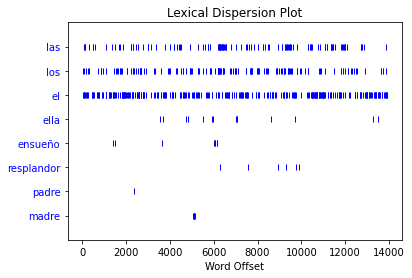

In [28]:
# Usando .dispersion_plot() podemos generar una gráfica donde se muestra el número de apariciones de una palabra 

tokens = nltk.word_tokenize(text = texto, language = "spanish") 
texto_nltk = nltk.Text(tokens = tokens) 

lista_palabras = ["las", "los", "el", "ella", "ensueño", "resplandor", "padre", "madre"] 

texto_nltk.dispersion_plot(words = lista_palabras)

### .FreqDist()

Retorna un diccionario donde las llaves son la palabras del texto y el valor son las veces que aparece en el texto.

In [29]:
distribucion = nltk.FreqDist(samples = texto_nltk)

distribucion

FreqDist({',': 1078, 'de': 639, 'la': 414, 'y': 367, 'que': 345, '.': 309, 'en': 299, 'el': 290, 'a': 179, 'un': 153, ...})

In [26]:
distribucion.most_common()

[(',', 1078),
 ('de', 639),
 ('la', 414),
 ('y', 367),
 ('que', 345),
 ('.', 309),
 ('en', 299),
 ('el', 290),
 ('a', 179),
 ('un', 153),
 ('los', 147),
 ('su', 135),
 ('!', 131),
 ('las', 123),
 ('del', 113),
 ('--', 108),
 ('se', 107),
 ('una', 106),
 (';', 104),
 ('mi', 103),
 ('al', 94),
 ('por', 87),
 ('más', 84),
 ('no', 78),
 ('con', 73),
 ('como', 72),
 ('sobre', 65),
 ('es', 63),
 ('sus', 62),
 (':', 61),
 ('«', 51),
 ('tu', 51),
 ('me', 51),
 ('»', 49),
 ('lo', 44),
 ('alma', 41),
 ('...', 38),
 ('todo', 36),
 ('?', 36),
 ('para', 35),
 ('noche', 34),
 ('ojos', 33),
 ('Y', 32),
 ('ha', 31),
 ('ese', 28),
 ('era', 28),
 ('corazón', 27),
 ('esa', 27),
 ('jamás', 27),
 ('tan', 26),
 ('o', 25),
 ('ya', 24),
 ('cual', 24),
 ('En', 22),
 ('han', 22),
 ('amor', 21),
 ('sin', 21),
 ('ni', 20),
 ('siempre', 20),
 ('nos', 19),
 ('te', 19),
 ('le', 19),
 ('Poe', 19),
 ('tiempo', 19),
 ('bajo', 18),
 ('si', 18),
 ('él', 18),
 ('mí', 18),
 ('dan', 18),
 ('Pero', 17),
 ('cuando', 17),
 ('L

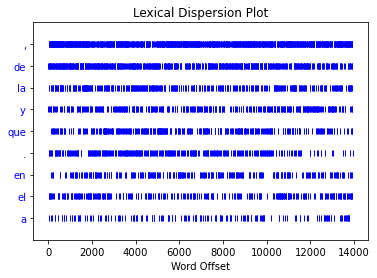

In [30]:
lista_palabras = [",", "de", "la", "y", "que", ".", "en", "el", "a"] 
texto_nltk.dispersion_plot(words = lista_palabras)

### Hapax

Un hapax es una palabra que aparece únicamente una vez en el texto.

In [31]:
# .Text()
texto_nltk = nltk.Text(tokens = tokens)

# .FreqDist()
distribucion = nltk.FreqDist(samples = texto_nltk)

# .hapaxes
hapaxes = distribucion.hapaxes()

for hapax in hapaxes: 
    print(hapax)

PRÓLOGO
húmeda
Iba
despacio
sirena
aullaba
roncamente
Quedaba
Fire
erecto
faro
estábamos
Sandy
Hook
salió
barco
sanidad
ladrante
slang
yanqui
sonaba
pabellón
bandas
pitos
arromadizados
humo
chimeneas
máquinas
ventrudas
estañado
caminaba
rumbo
bahía
decía
_all
right_
divisaban
barcos
Long
desarrollaba
cinta
costas
Staten
marco
viñeta
presentaba
tentando
lápiz
falta
fotográfica
agrupan
pasajeros
comerciante
gruesa
panza
congestionado
pavo
encorvadas
narices
israelitas
clergyman
huesoso
enfundado
levitón
cubierto
sombrero
fieltro
Biblia
usa
gorra
jockey
travesía
cantado
fonográfica
banjo
robusto
lampiño
aficionado
box
puños
desquijarrar
rinoceronte
Narrows
alcanza
pintoresca
florida
fortalezas
Luego
gigantesca
Madona
peana
islote
prolífica
dominadora
Nuestra
Señora
mamas
alimentan
sinnúmero
alzas
saludo
prosternándome
majestad
¡Ave
Good
morning
divino
icono
magna
excelsa
beldad
encarnas
manera
_fiat_
listas
bandera
iluminan
formidable
azules
Ave
contigo
bendita
¿sabes
herido
divinidad
man

In [32]:
print(len(hapaxes))

2499


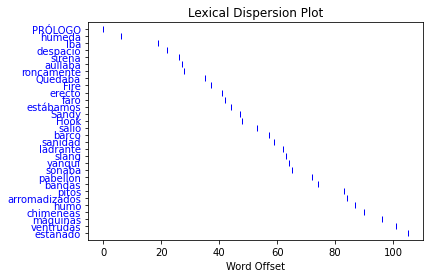

In [33]:
texto_nltk.dispersion_plot(words = hapaxes[:30])

### STOPWORDS

Las **`stopwords`** (palabras funcionales o palabras vacias) son las palabras sin significado como artículos, pronombres, preposiciones, etc. que son filtradas antes o después del procesamiento de datos **NLP**.

In [35]:
stopwords = nltk.corpus.stopwords.words("spanish")

for stopword in stopwords:
    print(stopword, end = " | ")

de | la | que | el | en | y | a | los | del | se | las | por | un | para | con | no | una | su | al | lo | como | más | pero | sus | le | ya | o | este | sí | porque | esta | entre | cuando | muy | sin | sobre | también | me | hasta | hay | donde | quien | desde | todo | nos | durante | todos | uno | les | ni | contra | otros | ese | eso | ante | ellos | e | esto | mí | antes | algunos | qué | unos | yo | otro | otras | otra | él | tanto | esa | estos | mucho | quienes | nada | muchos | cual | poco | ella | estar | estas | algunas | algo | nosotros | mi | mis | tú | te | ti | tu | tus | ellas | nosotras | vosotros | vosotras | os | mío | mía | míos | mías | tuyo | tuya | tuyos | tuyas | suyo | suya | suyos | suyas | nuestro | nuestra | nuestros | nuestras | vuestro | vuestra | vuestros | vuestras | esos | esas | estoy | estás | está | estamos | estáis | están | esté | estés | estemos | estéis | estén | estaré | estarás | estará | estaremos | estaréis | estarán | estaría | estarías | es

In [36]:
tokens = nltk.word_tokenize(text = texto, language = "spanish")

tokens_limpios = list() 

tokens = [token.lower() for token in tokens]

for token in tokens: 
    if token not in stopwords: 
        tokens_limpios.append(token)
        
print(f"Tamaño original: {len(tokens)}") 
print(f"Tamaño despues de stopwords: {len(tokens_limpios)}")

Tamaño original: 13932
Tamaño despues de stopwords: 8298


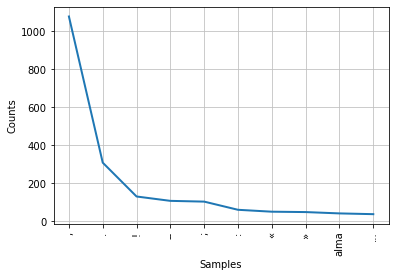

In [37]:
nltk.FreqDist(nltk.Text(tokens_limpios)).plot(10)

plt.show()

In [38]:
# Eliminamos elementos de tamaño 2 o menor:

tokens_limpios = list()

for token in tokens: 
    if token not in stopwords: 
        if len(token) > 2: 
            tokens_limpios.append(token)
            
print(len(tokens_limpios))

6258


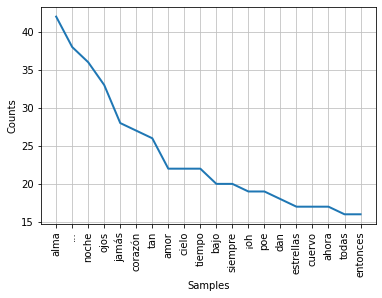

In [39]:
nltk.FreqDist(nltk.Text(tokens_limpios)).plot(20)

plt.show()

### Stemming

Reducir palabras a su raíz (pueden no tener significado):
 + Organise, organising, organisation --> organis
 + intelligence, intelligently --> intelligen
 
 Para hacer stemming usamos el algoritmo _**Porter Stemmer:** https://tartarus.org/martin/PorterStemmer/_

In [41]:
from nltk.stem import PorterStemmer

In [42]:
texto = "hi dear students, how are you doing? we are almost finishing the bootcamp. we hope you are learning and enjoying the course."
texto

'hi dear students, how are you doing? we are almost finishing the bootcamp. we hope you are learning and enjoying the course.'

In [43]:
# Inicializamos un objeto PorterStemmer()
stemmer = PorterStemmer()

" ".join([stemmer.stem(word) for word in  nltk.word_tokenize(text = texto, language = "english")])

'hi dear student , how are you do ? we are almost finish the bootcamp . we hope you are learn and enjoy the cours .'

In [44]:
stemmer.stem(word)

'madr'

### Lematización
Similar al stemming, pero reduce la palabra a una raíz que sí tiene significado:
+ going, goes, gone --> go
+ intelligence, intelligently --> intelligent

In [45]:
from nltk.stem import WordNetLemmatizer

In [46]:
texto = "hi dear students, how are you doing? we are almost finishing the bootcamp. we hope you are learning and enjoying the course."
texto

'hi dear students, how are you doing? we are almost finishing the bootcamp. we hope you are learning and enjoying the course.'

In [47]:
# Inicializamos un objeto WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()

" ".join([lemmatizer.lemmatize(word, pos="v") for word in  nltk.word_tokenize(text = texto, language = "english")])

'hi dear students , how be you do ? we be almost finish the bootcamp . we hope you be learn and enjoy the course .'

### Analisis de Sentimiento

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [50]:
texto = """The National Guard has been released in Minneapolis to do the job that the Democrat Mayor couldn’t do.
           Should have been used 2 days ago & there would not have been damage & Police Headquarters would not have
           been taken over & ruined. Great job by the National Guard. No games!"""

tokens = nltk.word_tokenize(text = texto)

In [51]:
for token in tokens:
    ss = sia.polarity_scores(token)
    print(token)
    print(ss)

The
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
National
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Guard
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
has
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
been
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
released
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
in
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Minneapolis
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
to
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
do
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
the
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
job
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
that
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
the
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Democrat
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Mayor
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
couldn
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

In [52]:
sia.polarity_scores(texto)

{'neg': 0.096, 'neu': 0.777, 'pos': 0.127, 'compound': 0.4059}

In [ ]:
################################################################################################################################